# Praca domowa 4

## Zadanie 1

In [62]:
import seaborn as sns
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

### a)

In [64]:
df1 = df.loc[(df.Publisher == "Nintendo") & (df.Year > 2015) & (df.NA_Sales < df.EU_Sales)]
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


### b)

In [65]:
df2 = df.loc[(df.Year == 2010)]
df2 = df2.groupby("Genre").Global_Sales.agg("sum").to_frame().sort_values(["Global_Sales"], ascending=False)
df2.iloc[0:1,:]

,Global_Sales
Genre,
Action,117.64


### c)

In [66]:
df3 = df.groupby("Genre")[["EU_Sales", "JP_Sales"]].agg("mean")
df3 = df3.loc[df3.EU_Sales < df3.JP_Sales]
df3 = df3.drop('EU_Sales', 1)
df3.reset_index(level=0, inplace=True)
df3 = df3.sort_values(["JP_Sales"], ascending=False)
df3 = df3.rename(columns={'Genre': 'Typ Gry', 'JP_Sales': 'Średnia sprzedaż w Japonii'})
df3

,Typ Gry,Średnia sprzedaż w Japonii
1,Role-Playing,0.238293
0,Puzzle,0.099439
2,Strategy,0.073284


## Zadanie 2

### Oryginalny wykres wraz ze źródłem

![title](Badplot_PD2.png)

Źródło: https://www.rp.pl/handel/art19066711-czarny-piatek-ma-byc-jak-potezny-dopalacz-dla-firm-i-sklepow

### Wykres w ggplot2

![title](Goodplot_PD2.png)

Link: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/SiudalskiTomasz/Praca%20domowa%20nr%202.pdf

### Poprawiony wykres w Pythonie

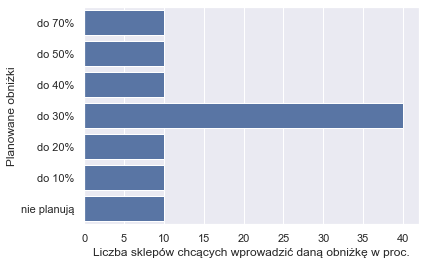

In [67]:
dataPlot = np.array([["Planowane obniżki", "Liczba sklepów chcących wprowadzić daną obniżkę w proc."],
                  ["nie planują", 10],
                  ["do 10%", 10],
                  ["do 20%", 10],
                  ["do 30%", 40],
                  ["do 40%", 10],
                  ["do 50%", 10],
                  ["do 70%", 10]])
    
dataPlot = pd.DataFrame(data=dataPlot[1:,0:],
                  columns=dataPlot[0,0:])

sns.set(style="darkgrid")
p = sns.barplot(x="Liczba sklepów chcących wprowadzić daną obniżkę w proc.", y="Planowane obniżki", data=dataPlot,
            label="Total", color="b")
p.invert_yaxis()

### Uzasadnienie

Wykres stworzony w Pythonie jest lepszy od tego z ggplot2, ponieważ nie posiada poziomych linii siatki, które są zbędne, gdyż każdy słupek jest podpisany. Ponadto koło słupków nie ma już wartości które również były niepotrzebne, obserwator może bez problemu odczytać wartości z wykresu. Uzasadnienie dlaczego wykres w ggplot2 jest lepszy od pierwotnego jest w pracy domowej nr 2.